https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction/data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("Dataset/loan_data.csv")
df.head() 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(381, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.describe

<bound method NDFrame.describe of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583        

In [6]:
df.isnull().sum()/df.shape[0]*100

Loan_ID              0.000000
Gender               1.312336
Married              0.000000
Dependents           2.099738
Education            0.000000
Self_Employed        5.511811
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           0.000000
Loan_Amount_Term     2.887139
Credit_History       7.874016
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [7]:
df.duplicated().sum()

0

In [8]:
df["Loan_Amount_Term"].value_counts(normalize = True)

Loan_Amount_Term
360.0    0.843243
180.0    0.078378
480.0    0.029730
300.0    0.018919
120.0    0.008108
84.0     0.008108
240.0    0.005405
60.0     0.002703
12.0     0.002703
36.0     0.002703
Name: proportion, dtype: float64

In [9]:
df["LoanAmount"].value_counts()

LoanAmount
120.0    19
110.0    16
100.0    15
128.0    11
113.0    11
         ..
59.0      1
63.0      1
101.0     1
48.0      1
40.0      1
Name: count, Length: 101, dtype: int64

From our accessing we need to :

1- Fill the null values with the mode value in in several columns (Gender , Dependents , Self_Employed , Loan_Amount_Term , Credit_History)

2- We need to change the representation of some categorical features into binary values (Gender , Married , Education , Self employed , Loan statues)

3- In Loan_Amount_Term columni noticed that 84% mostally of its values as 360 so i will change the representation of this column to be if the value >= 360 so it's 1 and if less it will be 0

4- I also noticed that Loan amount column suppose to represent the money in thounds but i found for example if a cell contain 3000 it contain only 3 so i will multibly the all values in this column by 1000

5- I will also rename Education column into Graduated and Loan_Amount_Term column into Long_term

6- I will drop the Loan_ID column

## Cleaning

In [10]:
df["LoanAmount"] = df["LoanAmount"]*1000
df["LoanAmount"]

0      128000.0
1       66000.0
2      120000.0
3      141000.0
4       95000.0
         ...   
376    128000.0
377    108000.0
378     71000.0
379     40000.0
380    133000.0
Name: LoanAmount, Length: 381, dtype: float64

In [11]:
df["Gender"] = np.where((df["Gender"]=="Male"), 1, np.where((df["Gender"]=="Female"), 0, np.nan))
df["Married"] = np.where((df["Married"]=="Yes"),1,0)
df["Education"] = np.where((df["Education"]=="Graduate"),1,0)
df["Self_Employed"] = np.where((df["Self_Employed"]=="Yes"),1 ,np.where((df["Self_Employed"]=="No"),0,np.nan))
df["Loan_Status"] = np.where((df["Loan_Status"]=="Y"),1,0)

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,1.0,1,1,1,0.0,4583,1508.0,128000.0,360.0,1.0,Rural,0
1,LP001005,1.0,1,0,1,1.0,3000,0.0,66000.0,360.0,1.0,Urban,1
2,LP001006,1.0,1,0,0,0.0,2583,2358.0,120000.0,360.0,1.0,Urban,1
3,LP001008,1.0,0,0,1,0.0,6000,0.0,141000.0,360.0,1.0,Urban,1
4,LP001013,1.0,1,0,0,0.0,2333,1516.0,95000.0,360.0,1.0,Urban,1


In [13]:
df["Loan_Amount_Term"] = np.where((df["Loan_Amount_Term"]>=360),1,np.where((df["Loan_Amount_Term"]<360),0,np.nan))

In [14]:
df.rename(columns = {"Loan_Amount_Term" : "Long_term" , "Education" : "Graduated"} , inplace = True)

In [15]:
df.drop(["Loan_ID"] , axis = 1 , inplace = True)

In [16]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


In [17]:
x=0
for i in (df.isnull().any().values):
  if i:
    df[df.isnull().any().index[x]].fillna(df[df.isnull().any().index[x]].mode()[0] , inplace = True)
  x+=1

/tmp/ipykernel_2603/12110402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[df.isnull().any().index[x]].fillna(df[df.isnull().any().index[x]].mode()[0] , inplace = True)
/tmp/ipykernel_2603/12110402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing

In [18]:
df.isnull().any()

Gender               False
Married              False
Dependents           False
Graduated            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Long_term            False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [19]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


In [20]:
quantile = df[["ApplicantIncome"	,"CoapplicantIncome"	,"LoanAmount"]].quantile([0.25,0.5,0.75])
for i in ["ApplicantIncome"	,"CoapplicantIncome"	,"LoanAmount"]:
    q1 = quantile[i][0.25]-(1.5*(quantile[i][0.75]-quantile[i][0.25]))
    q2 = quantile[i][0.75]+(1.5*(quantile[i][0.75]-quantile[i][0.25]))
    index = (df[(df[i]<q1) | (df[i]>q2)]).index
    df.drop(index , axis = 0 , inplace = True)

## Analysis Process

In [21]:
def prop_subplot(cols):
    fig, axes = plt.subplots(nrows=1, ncols=7, figsize=(20, 5))
    axes = axes.flatten()

    for i, col in enumerate(cols):
        g1 = df.groupby([col])["Loan_Status"].value_counts(normalize=True).reset_index(name="prop")
        g1 = g1[g1["Loan_Status"] == 1]
        g = sns.barplot(x=col, y="prop", data=g1, order=g1.sort_values("prop", ascending=False)[col], color='steelblue', ax=axes[i])
        g.set_xlabel(col)
        g.set_ylabel("Success In Repay The Loan")
        g.set_title(f"Success Rate by {col}")

    plt.tight_layout()
    plt.show()

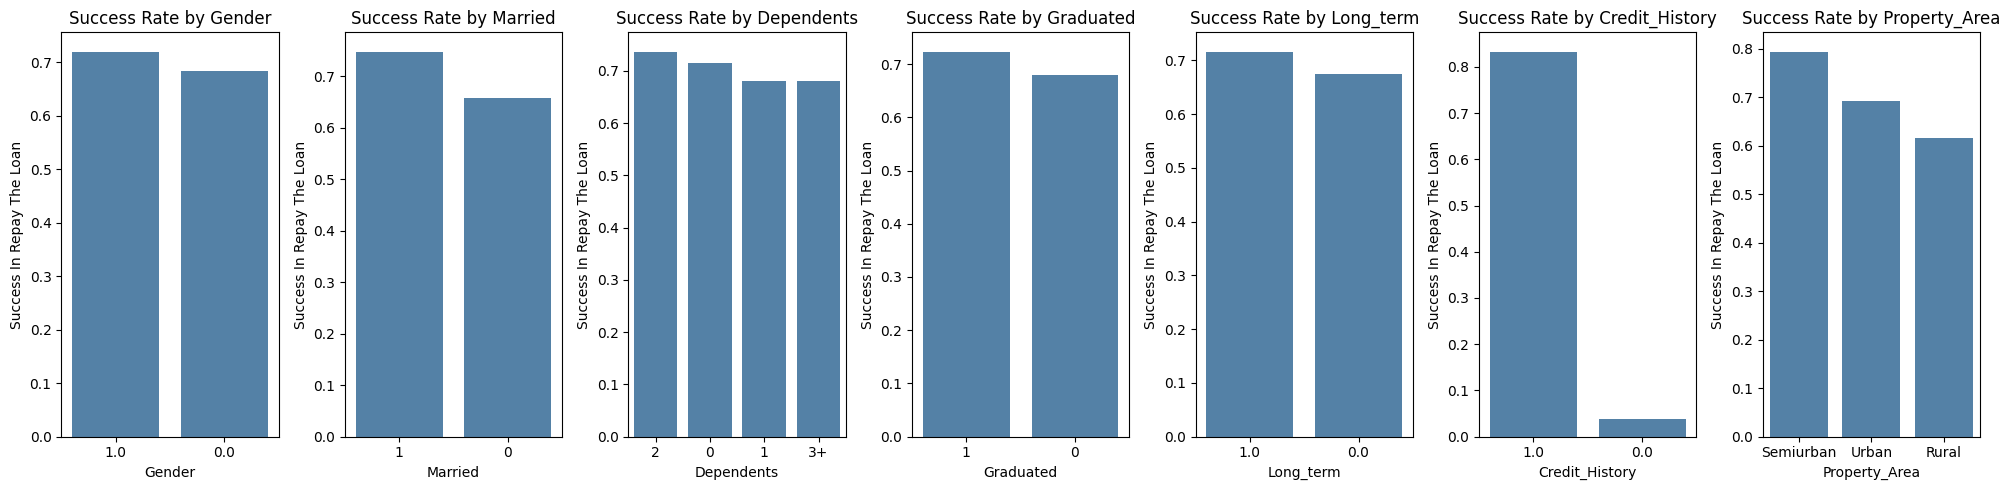

In [22]:
# Memanggil fungsi prop_subplot dengan daftar variabel yang diinginkan
prop_subplot(["Gender", "Married", "Dependents", "Graduated", "Long_term", "Credit_History", "Property_Area"])

From previous cells we can deduce that :
1- Male repay their loans more than female
2- Married pepole repay their loans more than not married
3- Graduated pepole repay their loans more than who didn't
4- Self employed pepole repay their loans less than who aren't
5- Long term loans it's more likley to be paied than short term loans
6- Pepole with strong Credit_History are more likily to pay the loan more than the pepole who has weak Credit_History (Strong Factor)
7- Semiurpan pepole more likly to repay the urpan pepole and rural pepole become the last
8- pepole with 2 Dependents more likely to be than 0 Dependents than 1 Dependents than +3 Dependents

#### Overall i think that Credit_History , Self employed , Property_Area are the strongest factors influnce the loan statues

In [23]:
def num(col2):
  fig,axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (6,4))
  sns.kdeplot(x = df[col2] , hue = df["Loan_Status"] , ax = axs[0])
  sns.violinplot(x = df["Loan_Status"]  ,y = df[col2] , ax = axs[1] , inner = "quartile")
  plt.tight_layout()
  plt.show()

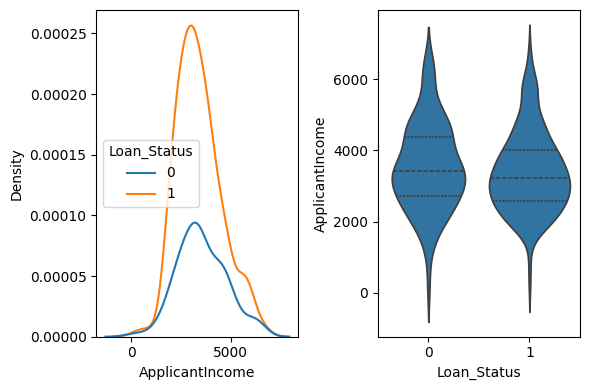

In [24]:
num("ApplicantIncome")

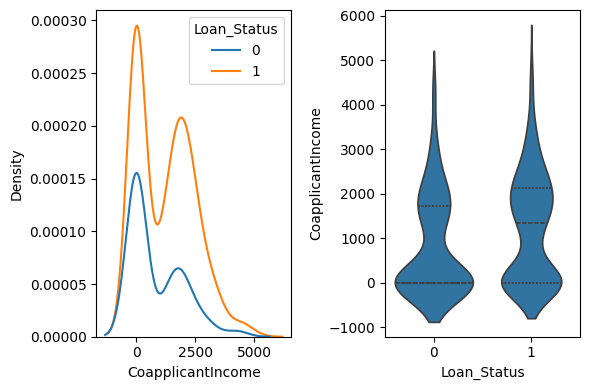

In [25]:
num("CoapplicantIncome")

In [26]:
q = df.groupby(["Loan_Status"])["CoapplicantIncome"].quantile([.25, .5, .75]).reset_index(name= "quantile")

/tmp/ipykernel_2603/3742304833.py:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:steelblue'` for the same effect.

  sns.barplot(x = q["Loan_Status"] , y = q["quantile"] , hue = q["level_1"] , color='steelblue')


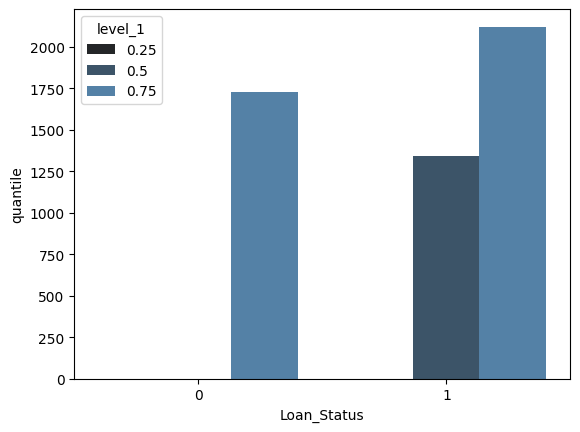

In [27]:
sns.barplot(x = q["Loan_Status"] , y = q["quantile"] , hue = q["level_1"] , color='steelblue')
plt.show()

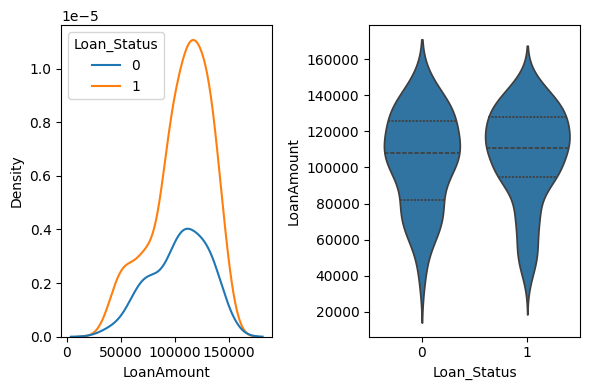

In [28]:
num("LoanAmount")

### I don't think there is importnat factors from prevoius features influnce the loan statues except CoapplicantIncome

In [29]:
df.head()

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


Let's cheak in the next cell the corr coeff between features and target

In [30]:
x = abs(df.drop(columns=["Dependents","Property_Area"]).corr()["Loan_Status"][0:-1]).sort_values()

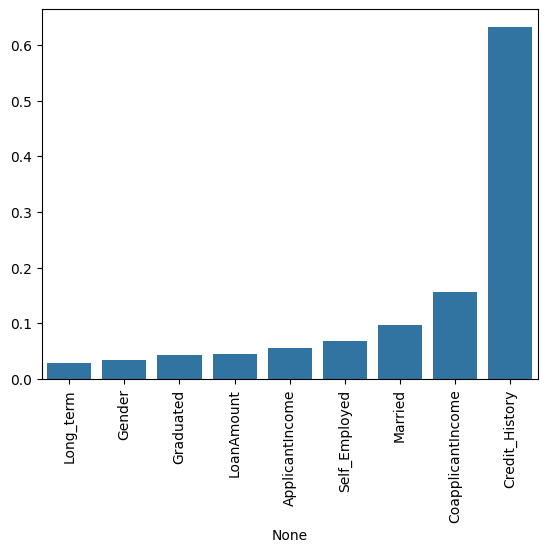

In [31]:
sns.barplot(x = x.index , y = x.values)
plt.xticks(rotation = 90)
plt.show()

Does the ratio between LoanAmount and ApplicantIncome influnce the loan status?

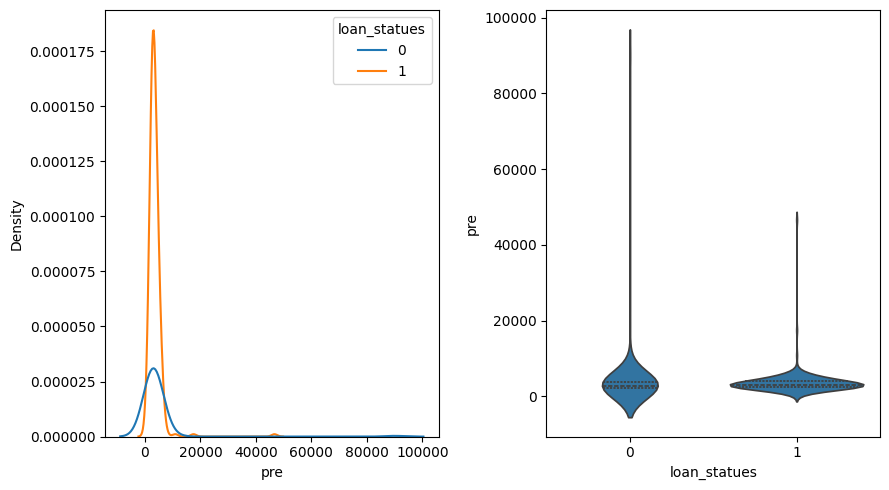

In [32]:
x1 = df[(df["Loan_Status"]==0)]
pre = (x1["LoanAmount"]/x1["ApplicantIncome"])*100

x2 = df[(df["Loan_Status"]==1)]
pre2 = (x2["LoanAmount"]/x2["ApplicantIncome"])*100

dic = {"pre" : list(pre)+list(pre2) , "loan_statues" : [0]*len(pre)+[1]*len(pre2)}
df2 = pd.DataFrame(dic)

fig,axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (9,5))
sns.kdeplot(x = df2["pre"] , hue = df2["loan_statues"], ax = axs[0])
sns.violinplot(x = df2["loan_statues"]  ,y = df2["pre"] , ax = axs[1] , inner = "quartile")
plt.tight_layout()
plt.show()

unfortunately i don't see influnce on the target here

Does the ratio between LoanAmount and CoApplicantIncome influnce the loan status?

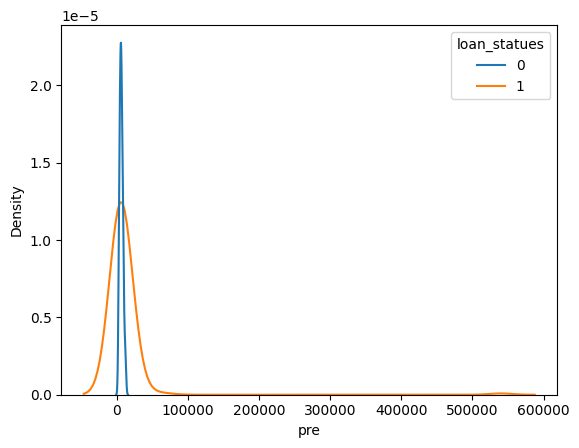

In [33]:
x1 = df[(df["Loan_Status"]==0)&(df["CoapplicantIncome"]>0)]
pre = (x1["LoanAmount"]/x1["CoapplicantIncome"])*100

x2 = df[(df["Loan_Status"]==1)]
pre2 = (x2["LoanAmount"]/x2["CoapplicantIncome"])*100

dic = {"pre" : list(pre)+list(pre2) , "loan_statues" : [0]*len(pre)+[1]*len(pre2)}
df2 = pd.DataFrame(dic)

sns.kdeplot(x = df2["pre"] , hue = df2["loan_statues"])
plt.show()

unfortunately i don't see influnce on the target here either

Does the ApplicantIncome depends on Property_Area

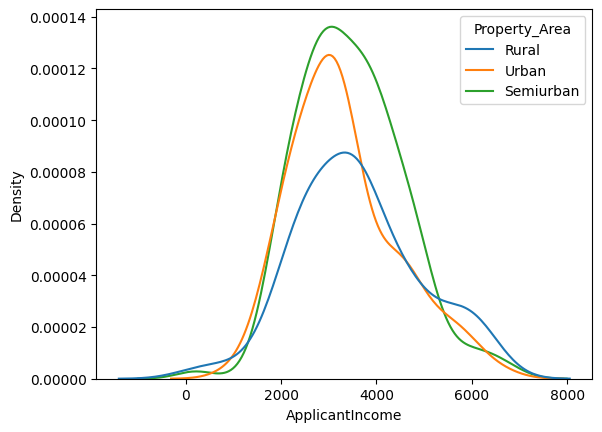

In [34]:
sns.kdeplot(x = df["ApplicantIncome"] , hue = df["Property_Area"])
plt.show()

There is no significance influnce here on the target

is the loan amount could change based on the area?

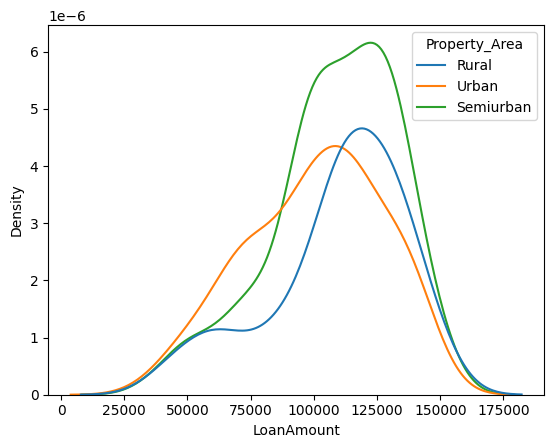

In [35]:
sns.kdeplot(x = df["LoanAmount"] , hue = df["Property_Area"])
plt.show()

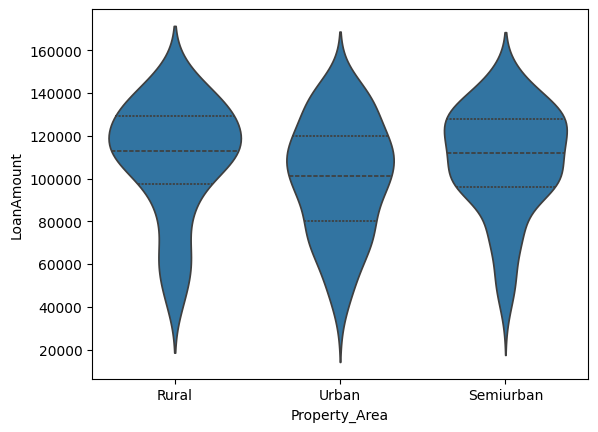

In [36]:
sns.violinplot(x = df["Property_Area"] , y = df["LoanAmount"] , inner = "quartile")
plt.show()

It seems like rural and semiurban take larger loan amount than the urban

Does being self employed influnce the Credit_History?

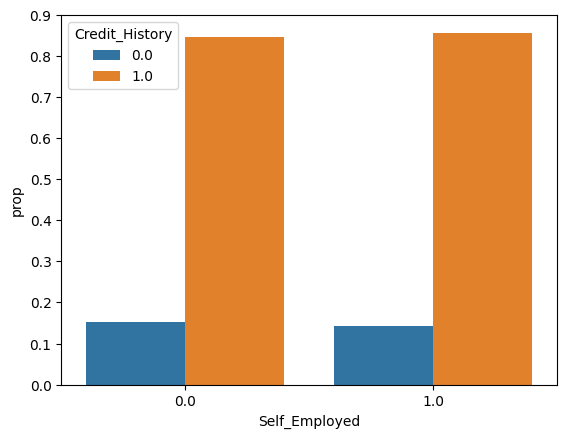

In [37]:
p = df.groupby(["Self_Employed"])["Credit_History"].value_counts(normalize = True).reset_index(name = "prop")
sns.barplot(x = p["Self_Employed"] , y = p["prop"] , hue = p["Credit_History"])
plt.show()

It doesn't seem that there is influance here

Does the Credit_History influnce the loan amount?

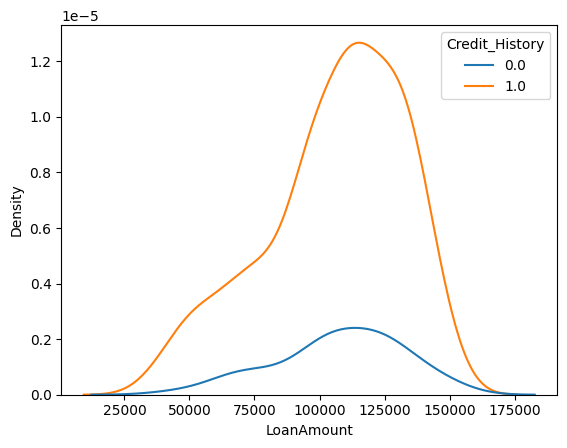

In [38]:
sns.kdeplot(x = df["LoanAmount"] , hue = df["Credit_History"])
plt.show()

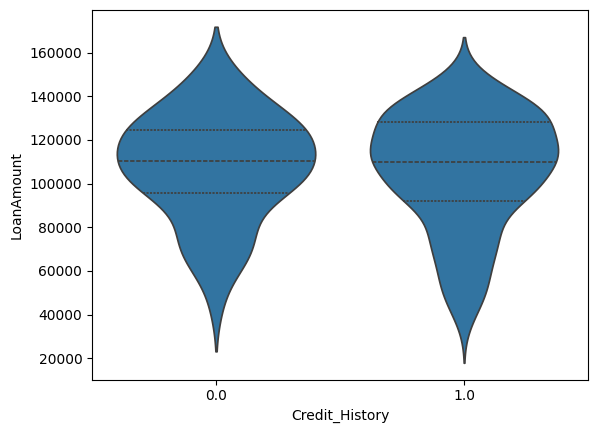

In [39]:
sns.violinplot(x = df["Credit_History"] , y = df["LoanAmount"] , inner = "quartile")
plt.show()

I don't think there is influnce here

## Feature Engineering

In [40]:
df_new = df.copy()
df_new.head(5)

,Gender,Married,Dependents,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Property_Area,Loan_Status
0,1.0,1,1,1,0.0,4583,1508.0,128000.0,1.0,1.0,Rural,0
1,1.0,1,0,1,1.0,3000,0.0,66000.0,1.0,1.0,Urban,1
2,1.0,1,0,0,0.0,2583,2358.0,120000.0,1.0,1.0,Urban,1
3,1.0,0,0,1,0.0,6000,0.0,141000.0,1.0,1.0,Urban,1
4,1.0,1,0,0,0.0,2333,1516.0,95000.0,1.0,1.0,Urban,1


Cheak Imbalance

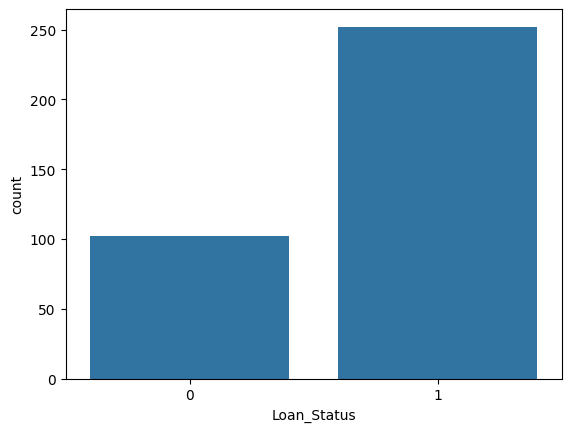

In [41]:
sns.countplot(x = df_new["Loan_Status"])
plt.show()

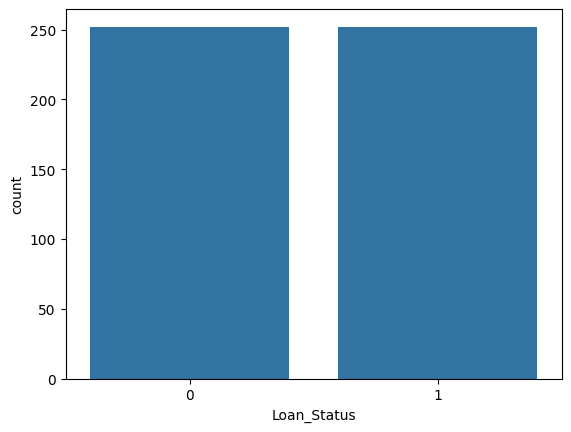

In [42]:
majority_count ,  minority_count = df_new["Loan_Status"].value_counts()
df_minority = df[df["Loan_Status"]==0]
min_samples = df_minority.sample(majority_count-minority_count , replace = True)
df_new = pd.concat([min_samples , df_new] , axis = 0)
sns.countplot(x = df_new["Loan_Status"])
plt.show()

Encode the catigorical variables

In [43]:
df_new = pd.get_dummies(df_new , columns = ["Dependents" , "Property_Area"])
df_new.sample(5)

,Gender,Married,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
185,0.0,0,1,0.0,5417,0.0,143000.0,1.0,0.0,0,True,False,False,False,False,False,True
75,0.0,1,1,0.0,2929,2333.0,139000.0,1.0,1.0,1,True,False,False,False,False,True,False
355,1.0,0,1,0.0,3333,0.0,70000.0,1.0,1.0,1,True,False,False,False,False,False,True
218,1.0,1,0,0.0,3083,2168.0,126000.0,1.0,1.0,1,False,False,True,False,False,False,True
37,0.0,1,0,0.0,1928,1644.0,100000.0,1.0,1.0,1,True,False,False,False,False,True,False


In [44]:
df_new.drop(columns = ["Dependents_0" , "Property_Area_Rural"] , axis = 1 , inplace = True)
df_new.sample(5)

,Gender,Married,Graduated,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Long_term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
259,1.0,1,0,0.0,2167,2400.0,115000.0,1.0,1.0,1,False,False,False,False,True
161,1.0,1,0,0.0,4931,0.0,128000.0,1.0,1.0,0,False,False,True,True,False
179,0.0,0,1,1.0,2600,1717.0,99000.0,0.0,1.0,0,False,False,False,True,False
43,1.0,1,1,0.0,3366,2200.0,135000.0,1.0,1.0,0,False,False,False,False,False
237,1.0,0,1,0.0,3069,0.0,71000.0,1.0,1.0,0,False,False,False,False,True


<Axes: >

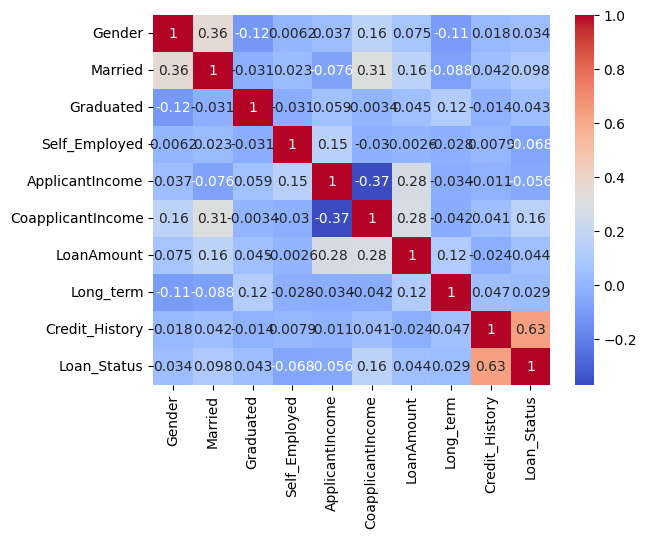

In [45]:
df_cor =df.corr(numeric_only=True)
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

In [46]:
X = df_new.drop(columns = ["Loan_Status"] , axis = 1 )
Y = df_new["Loan_Status"]

In [47]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y ,test_size = 0.25 , random_state = 42)

In [48]:
X = X.reset_index(drop = True)
Y = Y.reset_index(drop = True)

Scaling

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [50]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Definisikan model SVC dengan kernel linear
classifier_3 = SVC(kernel="linear")

# Latih model pada data pelatihan
classifier_3.fit(x_train, y_train)

# Prediksi label untuk data uji
y_predict = classifier_3.predict(x_test)

# Laporan klasifikasi sebelum penyetelan parameter
classification_rep = classification_report(y_test, y_predict)
print("Classification Report (Before Parameter Tuning):")
print(classification_rep)

# Parameter grid untuk pencarian parameter terbaik
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10],
    'degree': [2, 3, 4],
    'class_weight': ['balanced', None]
}

# Inisialisasi model SVC
svm = GridSearchCV(classifier_3, param_grid, cv=5)

# Latih model dengan pencarian grid
svm.fit(x_train, y_train)

# Mendapatkan parameter terbaik
best_params = svm.best_params_
print("\nBest Parameters:")
print(best_params)

# Mendapatkan skor terbaik
best_score = svm.best_score_
print("\nBest Score:", best_score)

# Prediksi label untuk data uji menggunakan model dengan parameter terbaik
y_predict_best = svm.predict(x_test)

# Laporan klasifikasi setelah penyetelan parameter
classification_rep_best = classification_report(y_test, y_predict_best)
print("\nClassification Report (After Parameter Tuning):")
print(classification_rep_best)


Classification Report (Before Parameter Tuning):
              precision    recall  f1-score   support

           0       0.88      0.60      0.71        62
           1       0.70      0.92      0.80        64

    accuracy                           0.76       126
   macro avg       0.79      0.76      0.75       126
weighted avg       0.79      0.76      0.76       126


Best Parameters:
{'C': 10, 'class_weight': 'balanced', 'degree': 2, 'gamma': 1, 'kernel': 'rbf'}

Best Score: 0.8729473684210527

Classification Report (After Parameter Tuning):
              precision    recall  f1-score   support

           0       0.89      0.79      0.84        62
           1       0.82      0.91      0.86        64

    accuracy                           0.85       126
   macro avg       0.85      0.85      0.85       126
weighted avg       0.85      0.85      0.85       126



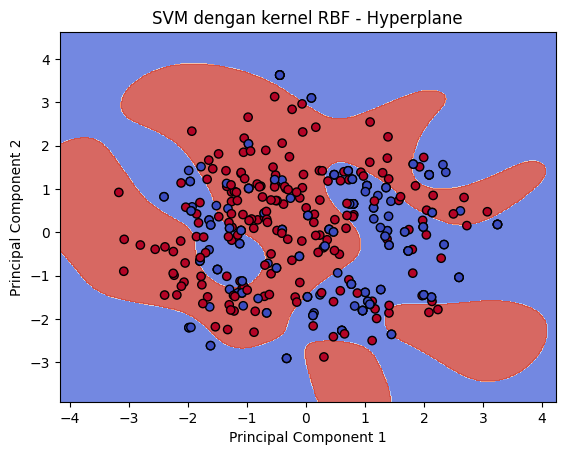

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Pilih dua fitur penting untuk visualisasi
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Latih model SVM dengan kernel RBF menggunakan parameter terbaik yang ditemukan
svm_rbf = SVC(kernel='rbf', C=best_params['C'], gamma=best_params['gamma'], class_weight=best_params['class_weight'])
svm_rbf.fit(x_train_pca, y_train)

# Buat grid untuk memvisualisasikan batas keputusan
h = .02  # Step size dalam mesh
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi label untuk setiap titik dalam grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot hasil visualisasi
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot juga data latihnya
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM dengan kernel RBF - Hyperplane')
plt.show()

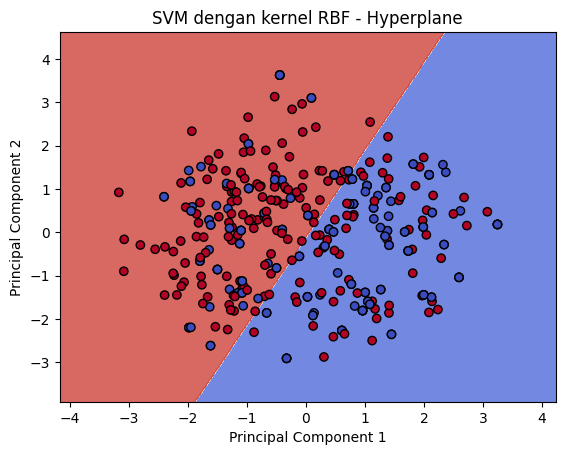

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Pilih dua fitur penting untuk visualisasi
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Latih model SVM dengan kernel RBF menggunakan parameter terbaik yang ditemukan
svm_rbf = SVC(kernel='linear', C=best_params['C'], gamma=best_params['gamma'], class_weight=best_params['class_weight'])
svm_rbf.fit(x_train_pca, y_train)

# Buat grid untuk memvisualisasikan batas keputusan
h = .02  # Step size dalam mesh
x_min, x_max = x_train_pca[:, 0].min() - 1, x_train_pca[:, 0].max() + 1
y_min, y_max = x_train_pca[:, 1].min() - 1, x_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Prediksi label untuk setiap titik dalam grid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot hasil visualisasi
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

# Plot juga data latihnya
plt.scatter(x_train_pca[:, 0], x_train_pca[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM dengan kernel RBF - Hyperplane')
plt.show()